In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

In [132]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)


C:\Users\16872\Documents\Spell\venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6855345911949685

In [133]:
feature_importance = rf_classifier.feature_importances_
temp = pd.DataFrame({'Feature': X_train.columns,'Importance':feature_importance})
temp

,Feature,Importance
0,elapsed_time,0.045001
1,set_no,0.004714
2,game_no,0.018927
3,point_no,0.036945
4,p1_sets,0.004789
...,...,...
56,p2_trend*server,0.039951
57,p1_trend*server,0.039713
58,set_no*server,0.022261
59,game_no*server,0.045456


<Axes: xlabel='Feature'>

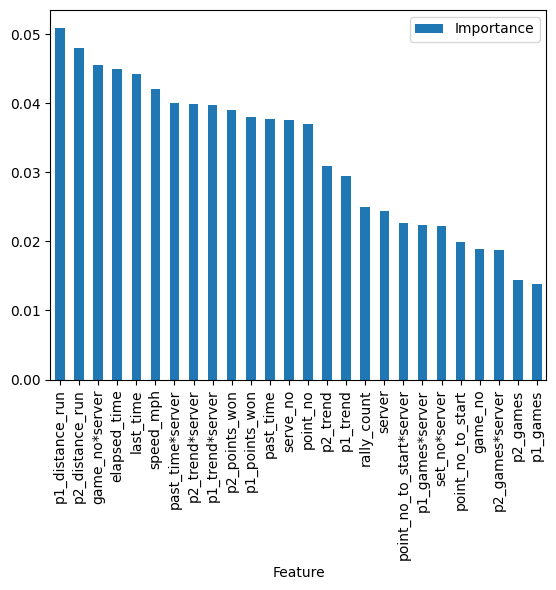

In [134]:
cols = temp[temp['Importance']>0.01]
cols.set_index('Feature', inplace=True)
cols.sort_values(by='Importance', ascending=False).plot(kind='bar')

In [135]:
cols.index

Index(['elapsed_time', 'game_no', 'point_no', 'p1_games', 'p2_games', 'server',
       'serve_no', 'p1_points_won', 'p2_points_won', 'p1_distance_run',
       'p2_distance_run', 'rally_count', 'speed_mph', 'p1_trend', 'p2_trend',
       'past_time', 'point_no_to_start', 'last_time', 'p1_games*server',
       'p2_games*server', 'past_time*server', 'p2_trend*server',
       'p1_trend*server', 'set_no*server', 'game_no*server',
       'point_no_to_start*server'],
      dtype='object', name='Feature')

In [136]:
rfc_cols = ['elapsed_time', 'game_no', 'point_no', 'p1_games', 'p2_games', 'server',
            'serve_no', 'p1_points_won', 'p2_points_won', 'p1_distance_run',
            'p2_distance_run', 'rally_count', 'speed_mph', 'p1_trend', 'p2_trend',
            'past_time', 'point_no_to_start', 'last_time', 'p1_games*server',
            'p2_games*server', 'past_time*server', 'p2_trend*server',
            'p1_trend*server', 'set_no*server', 'game_no*server',
            'point_no_to_start*server']
d_t_col = ['elapsed_time', 'point_no', 'server', 'serve_no', 'p1_points_won',
           'p2_points_won', 'p1_distance_run', 'p2_distance_run', 'rally_count',
           'speed_mph', 'p1_trend', 'p2_trend', 'past_time', 'point_no_to_start',
           'last_time', 'serve_width_W', 'p2_games*server', 'past_time*server',
           'p2_trend*server', 'p1_trend*server', 'game_no*server',
           'point_no_to_start*server']

In [137]:
len(cols)

26

In [138]:
len(d_t_col)

24

In [141]:
print(list(set(rfc_cols+d_t_col)))

['p2_points_won', 'p2_trend*server', 'p1_points_won', 'game_no*server', 'p1_place_ge*server', 'p2_games', 'elapsed_time', 'p1_games*server', 'p2_trend', 'return_depth_ND', 'point_no_to_start*server', 'server', 'rally_count', 'point_no_to_start', 'serve_width_BW', 'p1_trend', 'p2_games*server', 'p2_distance_run', 'speed_mph', 'p1_distance_run', 'point_no', 'game_no', 'p2_winner', 'serve_depth_NCTL', 'p1_games', 'past_time', 'past_time*server', 'p1_unf_err', 'last_time', 'serve_no', 'set_no*server', 'p1_trend*server']
